/Users/neupanek/anaconda3/envs/kngbq-LLM/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 58, 32)         │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 29, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 27, 64)         │         6,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 13, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 13, 64)         │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru (GRU)                       │ (None, 64)             │        24,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 72,769 (284.25 KB)

 Trainable params: 72,769 (284.25 KB)

 Non-trainable params: 0 (0.00 B)

You must install pydot (`pip install pydot`) for `plot_model` to work.
Epoch 1/6
1422/1422 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9638 - loss: 0.0887 - val_accuracy: 0.9997 - val_loss: 0.0016
Epoch 2/6
1422/1422 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.9993 - loss: 0.0026 - val_accuracy: 0.9988 - val_loss: 0.0069
Epoch 3/6
1422/1422 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.9997 - loss: 0.0013 - val_accuracy: 0.9995 - val_loss: 0.0011
Epoch 4/6
1422/1422 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.9994 - loss: 0.0016 - val_accuracy: 0.9995 - val_loss: 7.0341e-04
Epoch 5/6
1422/1422 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9999 - loss: 5.5669e-04 - val_accuracy: 1.0000 - val_loss: 2.5045e-04
Epoch 6/6
1422/1422 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9998 - loss: 8.6272e-04 - val_accuracy: 1.0000 - val_loss: 2.7666e-04
407/407 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9998 - loss: 4.9547e-04
Test Loss: 0.0006
Test Accuracy: 0.9997
Training t

FileNotFoundError: [Errno 2] No such file or directory: '/Users/neupanek/Downloads/FL-IDS/results/centralized/binary/train/accuracy_plot.jpg'

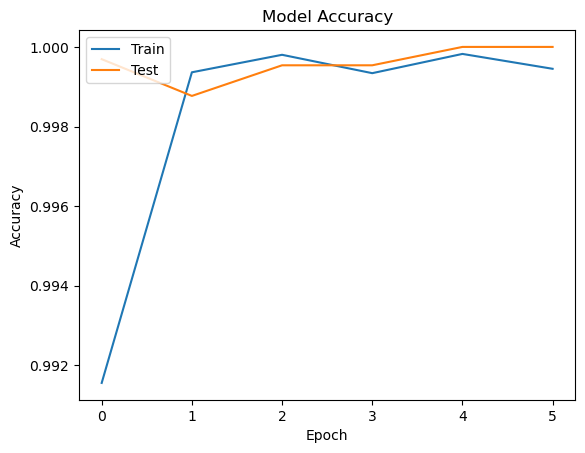

In [7]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv1D, MaxPooling1D, Flatten, LSTM, GRU
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import load_model

def load_and_preprocess_data(file_path):
    """Load dataset and preprocess it by mapping attack types and selecting features."""
    df = pd.read_csv(file_path, low_memory=False)
    # df.drop(columns=['Unnamed: 0'], inplace=True)
    # df = df.iloc[:, 2:].reset_index(drop=True)
    
    # Mapping attack types to numerical labels
    attacks = {'Normal': 0, 'MITM': 1, 'Uploading': 2, 'Ransomware': 3, 'SQL_injection': 4,
               'DDoS_HTTP': 5, 'DDoS_TCP': 6, 'Password': 7, 'Port_Scanning': 8,
               'Vulnerability_scanner': 9, 'Backdoor': 10, 'XSS': 11, 'Fingerprinting': 12,
               'DDoS_UDP': 13, 'DDoS_ICMP': 14}
    df['Attack_type'] = df['Attack_type'].map(attacks)
    
    X = df.drop(columns=['Attack_label', 'Attack_type'])
    y = df['Attack_label']
    
    return X, y

def feature_selection(X, y):
    """Select best features using Chi-Squared test."""
    chi_selector = SelectKBest(chi2, k='all')
    chi_selector.fit_transform(X, y)
    
    chi_scores = pd.DataFrame({'feature': X.columns, 'score': chi_selector.scores_}).dropna()
    chi_scores = chi_scores.sort_values(by='score', ascending=False)
    selected_features = chi_scores['feature'].tolist()
    
    return selected_features

def prepare_data(X, y, selected_features):
    """Scale and split data into training, validation, and test sets."""
    scaler = StandardScaler().fit(X[selected_features])
    X_train, X_test, y_train, y_test = train_test_split(X[selected_features], y, test_size=0.2, random_state=42)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.125, random_state=42)
    
    X_train = scaler.transform(X_train)
    X_val = scaler.transform(X_val)
    X_test = scaler.transform(X_test)
    
    return X_train, X_val, X_test, y_train, y_val, y_test, scaler

def cnn_lstm_gru_model(input_shape):
    """Define and compile CNN-LSTM-GRU model."""
    model = Sequential([
        Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=input_shape),
        MaxPooling1D(pool_size=2),
        Conv1D(filters=64, kernel_size=3, activation='relu'),
        MaxPooling1D(pool_size=2),
        LSTM(64, return_sequences=True),
        GRU(64, return_sequences=False),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])
    
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

def train_and_evaluate(model, X_train, y_train, X_val, y_val, X_test, y_test):
    """Train the model and evaluate its performance."""
    start_time = time.time()
    history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=6, batch_size=32)
    train_time = time.time() - start_time
    
    start_time = time.time()
    loss, accuracy = model.evaluate(X_test, y_test, batch_size=32)
    test_time = time.time() - start_time
    
    print(f'Test Loss: {loss:.4f}')
    print(f'Test Accuracy: {accuracy:.4f}')
    print(f'Training time: {train_time:.2f} seconds')
    print(f'Testing time: {test_time:.2f} seconds')
    
    return history, model

def plot_metrics(history, state):
    """Plot training and validation accuracy and loss."""
    plt.figure()
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.savefig(f'../results/centralized/binary/{state}/accuracy_plot.jpg')
    plt.close()
    
    plt.figure()
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.savefig(f'../results/centralized/binary/{state}/loss_plot.jpg')
    plt.close()

def evaluate_model(model, X_test, y_test, state):
    """Evaluate the model and generate a confusion matrix."""
    y_pred = model.predict(np.expand_dims(X_test, axis=2))
    if state == 'test':
        y_pred_binary = (y_pred > 0.5).astype(int)
        # print(classification_report(y_test, y_pred_binary, target_names=['No Intrusion', 'Intrusion']))
        
        conf_mat = confusion_matrix(y_test, y_pred_binary)
    else:
        print(classification_report(y_test, np.round(y_pred), target_names=['No Intrusion', 'Intrusion']))
        conf_mat = confusion_matrix(y_test, np.round(y_pred))
    sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=['No Intrusion', 'Intrusion'], yticklabels=['No Intrusion', 'Intrusion'])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.savefig(f'../results/centralized/binary/{state}/confusion_matrix.jpg')
    plt.close()

    cm_norm = conf_mat.astype('float') / conf_mat.sum(axis=1)[:, np.newaxis]

    # Step 5: Plot the normalized confusion matrix as percentages
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm_norm, annot=True, cmap='Blues', xticklabels=['No Intrusion', 'Intrusion'], yticklabels=['No Intrusion', 'Intrusion'], fmt='.2%')

    # Set the plot labels and title for the normalized confusion matrix
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Normalized Confusion Matrix (Percentages)')
    # Optional: Save the normalized confusion matrix plot
    plt.savefig(f'../results/centralized/binary/{state}/normalized_confusion_matrix.jpg')
    plt.close()

def load_and_preprocess_test_data(file_path, intended_columns, selected_features):
    df = pd.read_csv(file_path)
    for column in intended_columns:
        if column not in df.columns:
            df[column] = 0  # Default value for missing columns
    
    list_a = df.columns.to_list()
    list_b = intended_columns
    result = [item for item in list_a if item not in list_b]
    df.drop(columns=result, inplace=True)
    df = df[selected_features]
    return df

def main():
    """Main execution function."""
    file_path = '/Users/neupanek/Downloads/FL-IDS/federated/federated_datasets/train_data.csv'
    # file_path = 'datasets/combined_edgeIIot_500k_custom_DDos.csv'

    X, y = load_and_preprocess_data(file_path)
    selected_features = feature_selection(X, y)
    X_train, X_val, X_test, y_train, y_val, y_test, scaler = prepare_data(X, y, selected_features)
    
    input_shape = (X_train.shape[1], 1)
    model = cnn_lstm_gru_model(input_shape)
    model.summary()
    plot_model(model, to_file='model_structure.png', show_shapes=True)
    
    history, model = train_and_evaluate(model, X_train, y_train, X_val, y_val, X_test, y_test)
    plot_metrics(history, 'train')
    evaluate_model(model, X_test, y_test, 'train')
    
    model.save('cnn_lstm_gru_model_binary_working.h5')

    # Test with attack datasets 
    # test_file_path = 'datasets/validation_edgeIIot_500k_custom_DDos.csv'
    # test_file_path = 'datasets/Preprocessed_validation_all_fields.csv'
    test_file_path = '/Users/neupanek/Downloads/FL-IDS/federated/federated_datasets/test_data.csv'
    df_before = pd.read_csv(test_file_path)
    test_df = load_and_preprocess_test_data(test_file_path, selected_features, selected_features)
    X_test_scaled = scaler.transform(test_df)
    # test_df['Attack_label'] = 1
    y_test = df_before['Attack_label']
    evaluate_model(model, X_test_scaled, y_test, 'test')

if __name__ == "__main__":
    main()


# 49989:54988
# 54988:59988
# 59989:64988

In [12]:
import pandas as pd

df = pd.read_csv('/Users/neupanek/Downloads/FL-IDS/federated/federated_datasets/train_data.csv')
print(df.shape)

(64988, 63)


In [13]:
df

,tcp.ack,tcp.ack_raw,tcp.seq,udp.stream,dns.qry.name,icmp.transmit_timestamp,tcp.dstport,icmp.seq_le,icmp.checksum,tcp.checksum,...,dns_5,http2_0,dns_11,mbtcp.unit_id,http3_4,dns_10,dns.retransmit_request,icmp.unused,Attack_label,Attack_type
0,6.0,8.963239e+08,59.0,0.0,0.0,0.0,1883.0,0.0,0.0,41098.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,5.0,1.502596e+09,56.0,0.0,0.0,0.0,1883.0,0.0,0.0,23095.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.000000e+00,0.0,0.0,0.0,0.0,1883.0,0.0,0.0,6193.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,565.0,3.274262e+09,1.0,0.0,0.0,0.0,37574.0,0.0,0.0,33017.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5
4,1.0,3.940384e+08,1.0,0.0,0.0,0.0,9232.0,0.0,0.0,25818.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64983,286.0,1.444718e+09,1.0,0.0,0.0,0.0,55537.0,0.0,0.0,33910.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4
64984,6149.0,1.409669e+09,39949.0,0.0,0.0,0.0,54989.0,0.0,0.0,33768.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4
64985,286.0,1.444718e+09,195.0,0.0,0.0,0.0,55537.0,0.0,0.0,33981.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4
64986,195.0,1.221744e+09,286.0,0.0,0.0,0.0,5000.0,0.0,0.0,57744.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4


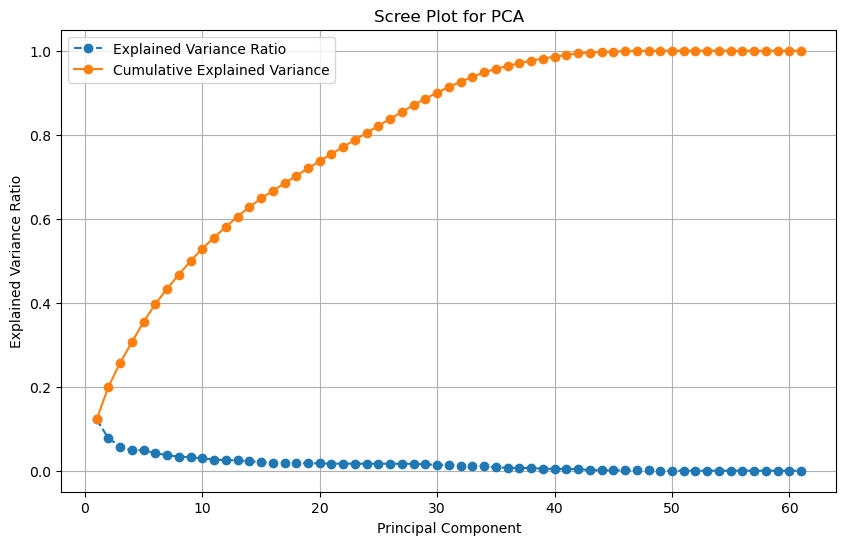

Explained Variance Ratios: [1.21980605e-01 7.74433555e-02 5.76165554e-02 4.88814488e-02
 4.88215660e-02 4.17435710e-02 3.71002119e-02 3.34983678e-02
 3.22508202e-02 2.93100797e-02 2.65069576e-02 2.53992266e-02
 2.45323340e-02 2.25669693e-02 2.05562279e-02 1.81725458e-02
 1.80050915e-02 1.78487636e-02 1.76602610e-02 1.74345986e-02
 1.69090595e-02 1.68234143e-02 1.67533310e-02 1.66829431e-02
 1.66740500e-02 1.66672597e-02 1.66003379e-02 1.64611467e-02
 1.51117195e-02 1.41432481e-02 1.37500521e-02 1.21870799e-02
 1.16182645e-02 1.07352106e-02 8.38352197e-03 6.83254237e-03
 6.61400597e-03 6.16068484e-03 4.97821616e-03 4.34206399e-03
 4.24266217e-03 3.70491699e-03 1.95934164e-03 1.13673980e-03
 9.86234879e-04 9.38112652e-04 6.55506012e-04 6.06488905e-04
 1.22871104e-05 7.89640935e-17 6.63982489e-17 5.58697706e-17
 3.34296545e-17 1.90162568e-17 1.46925277e-19 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00]
Cumulative Explained Variance: [0.1219806

In [14]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Step 1: Load and preprocess the dataset
# Assuming the dataset is in a pandas DataFrame (replace 'your_data.csv' with your actual file or data)
# For this example, I'll assume the data is already loaded as 'df'
# df = pd.read_csv('your_data.csv')

# Sample data (replace this with your actual DataFrame loading)

# Separate features and labels
X = df.drop(['Attack_label', 'Attack_type'], axis=1)  # Features
y = df[['Attack_label', 'Attack_type']]  # Labels

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 2: Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Step 3: Create a scree plot
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

# Create the scree plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='--', label='Explained Variance Ratio')
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='-', label='Cumulative Explained Variance')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot for PCA')
plt.legend()
plt.grid(True)
plt.show()

# Step 4: Print explained variance ratios and suggest number of components
print("Explained Variance Ratios:", explained_variance_ratio)
print("Cumulative Explained Variance:", cumulative_variance)

# Suggest number of components to retain (e.g., 90% variance)
n_components = np.argmax(cumulative_variance >= 0.9) + 1
print(f"Number of components to retain 90% variance: {n_components}")

In [15]:
feature_importance = pd.DataFrame(pca.components_, columns=X.columns, index=[f'PC{i+1}' for i in range(pca.n_components_)])
print(feature_importance.iloc[:5])  # Top 5 components

      tcp.ack  tcp.ack_raw   tcp.seq  udp.stream  dns.qry.name  \
PC1 -0.010762     0.025641 -0.053962   -0.007807     -0.002862   
PC2 -0.230252     0.275153  0.100872   -0.138016     -0.056321   
PC3  0.013541     0.019626 -0.004507    0.007355      0.003467   
PC4 -0.033623     0.020556  0.015093   -0.009361     -0.005414   
PC5 -0.056446     0.027149  0.031091   -0.016905     -0.009710   

     icmp.transmit_timestamp  tcp.dstport  icmp.seq_le  icmp.checksum  \
PC1                -0.000390    -0.030547    -0.009711      -0.009206   
PC2                -0.007339     0.239318    -0.190978      -0.181165   
PC3                 0.000428    -0.100214     0.011755       0.011159   
PC4                -0.000638     0.010693    -0.018372      -0.017450   
PC5                -0.001143     0.032772    -0.032946      -0.031294   

     tcp.checksum  ...     dns_4     dns_9     dns_5   http2_0    dns_11  \
PC1      0.005463  ...  0.002634  0.014255  0.002495  0.003162  0.005973   
PC2      0.1

In [16]:
# Apply PCA with 30 components
pca = PCA(n_components=30)
X_pca_reduced = pca.fit_transform(X_scaled)

# X_pca_reduced is now a matrix with 30 columns, ready for further analysis
print("Shape of reduced dataset:", X_pca_reduced.shape)

Shape of reduced dataset: (64988, 30)


In [23]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv1D, MaxPooling1D, Flatten, LSTM, GRU
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import load_model

def load_and_preprocess_data(file_path):
    """Load dataset and preprocess it by mapping attack types and selecting features."""
    df = pd.read_csv(file_path, low_memory=False)
    # df.drop(columns=['Unnamed: 0'], inplace=True)
    # df = df.iloc[:, 2:].reset_index(drop=True)
    
    # Mapping attack types to numerical labels
    attacks = {'Normal': 0, 'MITM': 1, 'Uploading': 2, 'Ransomware': 3, 'SQL_injection': 4,
               'DDoS_HTTP': 5, 'DDoS_TCP': 6, 'Password': 7, 'Port_Scanning': 8,
               'Vulnerability_scanner': 9, 'Backdoor': 10, 'XSS': 11, 'Fingerprinting': 12,
               'DDoS_UDP': 13, 'DDoS_ICMP': 14}
    df['Attack_type'] = df['Attack_type'].map(attacks)
    
    X = df.drop(columns=['Attack_label', 'Attack_type'])
    y = df['Attack_label']
    
    return X, y

def feature_selection(X, y):
    """Select best features using Chi-Squared test."""
    # Ensure non-negative data for chi2
    X_non_negative = X.where(X >= 0, 0)
    chi_selector = SelectKBest(chi2, k='all')
    chi_selector.fit_transform(X_non_negative, y)
    
    chi_scores = pd.DataFrame({'feature': X.columns, 'score': chi_selector.scores_}).dropna()
    chi_scores = chi_scores.sort_values(by='score', ascending=False)
    selected_features = chi_scores['feature'].tolist()
    
    return selected_features

def prepare_data(X, y, selected_features, n_components=30):
    """Scale, apply PCA, and split data into training, validation, and test sets."""
    # Select features
    X_selected = X[selected_features]
    
    # Standardize the features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_selected)
    
    # Apply PCA
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(X_scaled)
    
    # Generate scree plot
    explained_variance_ratio = pca.explained_variance_ratio_
    cumulative_variance = np.cumsum(explained_variance_ratio)
    
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='--', label='Explained Variance Ratio')
    plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='-', label='Cumulative Explained Variance')
    plt.xlabel('Principal Component')
    plt.ylabel('Explained Variance Ratio')
    plt.title('Scree Plot for PCA')
    plt.legend()
    plt.grid(True)
    plt.savefig('../results/PCA/scree_plot.jpg')
    plt.close()
    
    # Print PCA results
    print("Explained Variance Ratios:", explained_variance_ratio)
    print("Cumulative Explained Variance:", cumulative_variance)
    print(f"Number of components retained: {n_components}")
    
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.125, random_state=42)
    
    return X_train, X_val, X_test, y_train, y_val, y_test, scaler, pca

def cnn_lstm_gru_model(input_shape):
    """Define and compile CNN-LSTM-GRU model."""
    model = Sequential([
        Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=input_shape),
        MaxPooling1D(pool_size=2),
        Conv1D(filters=64, kernel_size=3, activation='relu'),
        MaxPooling1D(pool_size=2),
        LSTM(64, return_sequences=True),
        GRU(64, return_sequences=False),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])
    
    model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
    return model

def train_and_evaluate(model, X_train, y_train, X_val, y_val, X_test, y_test):
    """Train the model and evaluate its performance."""
    start_time = time.time()
    history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=6, batch_size=32)
    train_time = time.time() - start_time
    
    start_time = time.time()
    loss, accuracy = model.evaluate(X_test, y_test, batch_size=32)
    test_time = time.time() - start_time
    
    print(f'Test Loss: {loss:.4f}')
    print(f'Test Accuracy: {accuracy:.4f}')
    print(f'Training time: {train_time:.2f} seconds')
    print(f'Testing time: {test_time:.2f} seconds')
    
    return history, model

def plot_metrics(history, state):
    """Plot training and validation accuracy and loss."""
    plt.figure()
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.savefig(f'../results/PCA/{state}/accuracy_plot.jpg')
    plt.close()
    
    plt.figure()
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.savefig(f'../results/PCA/{state}/loss_plot.jpg')
    plt.close()

def evaluate_model(model, X_test, y_test, state):
    """Evaluate the model and generate a confusion matrix."""
    y_pred = model.predict(X_test)
    y_pred_binary = (y_pred > 0.5).astype(int)
    
    print(classification_report(y_test, y_pred_binary, target_names=['No Intrusion', 'Intrusion']))
    conf_mat = confusion_matrix(y_test, y_pred_binary)
    
    # Plot confusion matrix
    plt.figure(figsize=(6, 5))
    sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=['No Intrusion', 'Intrusion'], yticklabels=['No Intrusion', 'Intrusion'])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.savefig(f'../results/PCA/{state}/confusion_matrix.jpg')
    plt.close()
    
    # Plot normalized confusion matrix
    cm_norm = conf_mat.astype('float') / conf_mat.sum(axis=1)[:, np.newaxis]
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm_norm, annot=True, cmap='Blues', xticklabels=['No Intrusion', 'Intrusion'], yticklabels=['No Intrusion', 'Intrusion'], fmt='.2%')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Normalized Confusion Matrix (Percentages)')
    plt.savefig(f'../results/PCA/{state}/normalized_confusion_matrix.jpg')
    plt.close()

def load_and_preprocess_test_data(file_path, intended_columns, selected_features, scaler, pca):
    """Load and preprocess test data, applying the same scaling and PCA transformation."""
    df = pd.read_csv(file_path)
    for column in intended_columns:
        if column not in df.columns:
            df[column] = 0  # Default value for missing columns
    
    # Drop columns not in intended_columns
    list_a = df.columns.to_list()
    list_b = intended_columns
    result = [item for item in list_a if item not in list_b]
    df.drop(columns=result, inplace=True)
    
    # Select features and apply scaling and PCA
    df = df[selected_features]
    X_test_scaled = scaler.transform(df)
    X_test_pca = pca.transform(X_test_scaled)
    
    return X_test_pca

def main():
    """Main execution function."""
    file_path = '/Users/neupanek/Downloads/FL-IDS/federated/federated_datasets/train_data.csv'
    
    # Load and preprocess data
    X, y = load_and_preprocess_data(file_path)
    
    # Perform feature selection
    selected_features = feature_selection(X, y)
    
    # Prepare data with PCA
    X_train, X_val, X_test, y_train, y_val, y_test, scaler, pca = prepare_data(X, y, selected_features, n_components=20)
    
    # Reshape data for CNN input (samples, timesteps, features)
    X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
    X_val = X_val.reshape(X_val.shape[0], X_val.shape[1], 1)
    X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)
    
    # Define and train model
    input_shape = (X_train.shape[1], 1)
    model = cnn_lstm_gru_model(input_shape)
    model.summary()
    plot_model(model, to_file='../results/PCA/model_structure.png', show_shapes=True)
    
    history, model = train_and_evaluate(model, X_train, y_train, X_val, y_val, X_test, y_test)
    plot_metrics(history, 'train')
    evaluate_model(model, X_test, y_test, 'train')
    
    model.save('..../results/PCA/cnn_lstm_gru_model_binary_pca.h5')
    
    # Test with attack datasets
    test_file_path = '/Users/neupanek/Downloads/FL-IDS/federated/federated_datasets/test_data.csv'
    df_before = pd.read_csv(test_file_path)
    X_test_pca = load_and_preprocess_test_data(test_file_path, selected_features, selected_features, scaler, pca)
    X_test_pca = X_test_pca.reshape(X_test_pca.shape[0], X_test_pca.shape[1], 1)
    y_test = df_before['Attack_label']
    evaluate_model(model, X_test_pca, y_test, 'test')

if __name__ == "__main__":
    main()

Explained Variance Ratios: [0.12198061 0.07744336 0.05761656 0.04888145 0.04882157 0.04174357
 0.03710021 0.03349837 0.03225082 0.02931008 0.02650696 0.02539923
 0.02453233 0.02256697 0.02055623 0.01817255 0.01800509 0.01784876
 0.01766026 0.0174346 ]
Cumulative Explained Variance: [0.12198061 0.19942396 0.25704052 0.30592196 0.35474353 0.3964871
 0.43358731 0.46708568 0.4993365  0.52864658 0.55515354 0.58055277
 0.6050851  0.62765207 0.6482083  0.66638084 0.68438593 0.7022347
 0.71989496 0.73732956]
Number of components retained: 20


/Users/neupanek/anaconda3/envs/kngbq-LLM/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_12 (Conv1D)              │ (None, 18, 32)         │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_12 (MaxPooling1D) │ (None, 9, 32)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_13 (Conv1D)              │ (None, 7, 64)          │         6,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_13 (MaxPooling1D) │ (None, 3, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_6 (LSTM)                   │ (None, 3, 64)          │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_6 (GRU)                     │ (None, 64)             │        24,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 72,769 (284.25 KB)

 Trainable params: 72,769 (284.25 KB)

 Non-trainable params: 0 (0.00 B)

You must install pydot (`pip install pydot`) for `plot_model` to work.
Epoch 1/6
1422/1422 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9775 - loss: 0.0777 - val_accuracy: 0.9977 - val_loss: 0.0032
Epoch 2/6
1422/1422 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9984 - loss: 0.0026 - val_accuracy: 0.9991 - val_loss: 0.0020
Epoch 3/6
1422/1422 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9987 - loss: 0.0037 - val_accuracy: 0.9980 - val_loss: 0.0026
Epoch 4/6
1422/1422 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9990 - loss: 0.0017 - val_accuracy: 1.0000 - val_loss: 2.6628e-04
Epoch 5/6
1422/1422 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9996 - loss: 0.0015 - val_accuracy: 0.9998 - val_loss: 8.6591e-04
Epoch 6/6
1422/1422 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9994 - loss: 0.0045 - val_accuracy: 0.9997 - val_loss: 0.0034
407/407 ━━━━━━━━━━━━━━━━━━━━ 0s 795us/step - accuracy: 0.9998 - loss: 6.7886e-04
Test Loss: 0.0009
Test Accuracy: 0.9998
Training time: 26.02 secon

              precision    recall  f1-score   support

No Intrusion       1.00      1.00      1.00      7274
   Intrusion       1.00      1.00      1.00      5724

    accuracy                           1.00     12998
   macro avg       1.00      1.00      1.00     12998
weighted avg       1.00      1.00      1.00     12998

469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
              precision    recall  f1-score   support

No Intrusion       0.00      0.00      0.00         0
   Intrusion       1.00      1.00      1.00     14998

    accuracy                           1.00     14998
   macro avg       0.50      0.50      0.50     14998
weighted avg       1.00      1.00      1.00     14998



/Users/neupanek/anaconda3/envs/kngbq-LLM/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/neupanek/anaconda3/envs/kngbq-LLM/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/neupanek/anaconda3/envs/kngbq-LLM/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is",

In [25]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv1D, MaxPooling1D, Flatten, LSTM, GRU
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.utils import plot_model

def load_and_preprocess_data(file_path):
    """Load dataset and preprocess it by mapping attack types and selecting features."""
    df = pd.read_csv(file_path, low_memory=False)
    
    # Mapping attack types to numerical labels
    attacks = {'Normal': 0, 'MITM': 1, 'Uploading': 2, 'Ransomware': 3, 'SQL_injection': 4,
               'DDoS_HTTP': 5, 'DDoS_TCP': 6, 'Password': 7, 'Port_Scanning': 8,
               'Vulnerability_scanner': 9, 'Backdoor': 10, 'XSS': 11, 'Fingerprinting': 12,
               'DDoS_UDP': 13, 'DDoS_ICMP': 14}
    df['Attack_type'] = df['Attack_type'].map(attacks)
    
    X = df.drop(columns=['Attack_label', 'Attack_type'])
    y = df['Attack_label']
    
    return X, y

def feature_selection(X, y):
    """Select best features using Chi-Squared test."""
    X_non_negative = X.where(X >= 0, 0)
    chi_selector = SelectKBest(chi2, k='all')
    chi_selector.fit_transform(X_non_negative, y)
    
    chi_scores = pd.DataFrame({'feature': X.columns, 'score': chi_selector.scores_}).dropna()
    chi_scores = chi_scores.sort_values(by='score', ascending=False)
    selected_features = chi_scores['feature'].tolist()
    
    return selected_features

def prepare_data(X, y, selected_features, n_components=None):
    """Scale, optionally apply PCA, and split data into training, validation, and test sets."""
    X_selected = X[selected_features]
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_selected)
    
    if n_components is not None:
        pca = PCA(n_components=n_components)
        X_processed = pca.fit_transform(X_scaled)
        
        explained_variance_ratio = pca.explained_variance_ratio_
        cumulative_variance = np.cumsum(explained_variance_ratio)
        
        plt.figure(figsize=(10, 6))
        plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='--', label='Explained Variance Ratio')
        plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='-', label='Cumulative Explained Variance')
        plt.xlabel('Principal Component')
        plt.ylabel('Explained Variance Ratio')
        plt.title('Scree Plot for PCA')
        plt.legend()
        plt.grid(True)
        os.makedirs('../results/PCA/train', exist_ok=True)
        plt.savefig('../results/PCA/train/scree_plot.jpg')
        plt.close()
        
        print("Explained Variance Ratios:", explained_variance_ratio)
        print("Cumulative Explained Variance:", cumulative_variance)
        print(f"Number of components retained: {n_components}")
    else:
        X_processed = X_scaled
        pca = None
        print("No PCA applied. Using original features.")
    
    X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.125, random_state=42)
    
    return X_train, X_val, X_test, y_train, y_val, y_test, scaler, pca

def cnn_lstm_gru_model(input_shape):
    """Define and compile CNN-LSTM-GRU model."""
    model = Sequential([
        Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=input_shape),
        MaxPooling1D(pool_size=2),
        Conv1D(filters=64, kernel_size=3, activation='relu'),
        MaxPooling1D(pool_size=2),
        LSTM(64, return_sequences=True),
        GRU(64, return_sequences=False),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])
    
    model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
    return model

def train_and_evaluate(model, X_train, y_train, X_val, y_val, X_test, y_test, model_type):
    """Train the model and evaluate its performance."""
    start_time = time.time()
    history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=6, batch_size=32)
    train_time = time.time() - start_time
    
    start_time = time.time()
    loss, accuracy = model.evaluate(X_test, y_test, batch_size=32)
    test_time = time.time() - start_time
    
    print(f'{model_type} Test Loss: {loss:.4f}')
    print(f'{model_type} Test Accuracy: {accuracy:.4f}')
    print(f'{model_type} Training time: {train_time:.2f} seconds')
    print(f'{model_type} Testing time: {test_time:.2f} seconds')
    
    return history, model

def plot_metrics(history, state, model_type):
    """Plot training and validation accuracy and loss."""
    os.makedirs(f'../results/{model_type}/{state}', exist_ok=True)
    
    plt.figure()
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title(f'{model_type} Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.savefig(f'../results/{model_type}/{state}/accuracy_plot.jpg')
    plt.close()
    
    plt.figure()
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title(f'{model_type} Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.savefig(f'../results/{model_type}/{state}/loss_plot.jpg')
    plt.close()

def evaluate_model(model, X_test, y_test, state, model_type):
    """Evaluate the model and generate a confusion matrix."""
    y_pred = model.predict(X_test)
    y_pred_binary = (y_pred > 0.5).astype(int)
    
    print(f"\n{model_type} Classification Report ({state}):")
    print(classification_report(y_test, y_pred_binary, target_names=['No Intrusion', 'Intrusion'], zero_division=0))
    
    conf_mat = confusion_matrix(y_test, y_pred_binary)
    
    plt.figure(figsize=(6, 5))
    sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=['No Intrusion', 'Intrusion'], yticklabels=['No Intrusion', 'Intrusion'])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f'{model_type} Confusion Matrix ({state})')
    plt.savefig(f'../results/{model_type}/{state}/confusion_matrix.jpg')
    plt.close()
    
    cm_norm = conf_mat.astype('float') / conf_mat.sum(axis=1)[:, np.newaxis]
    cm_norm = np.nan_to_num(cm_norm)  # Handle division by zero
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm_norm, annot=True, cmap='Blues', xticklabels=['No Intrusion', 'Intrusion'], yticklabels=['No Intrusion', 'Intrusion'], fmt='.2%')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title(f'{model_type} Normalized Confusion Matrix (Percentages) ({state})')
    plt.savefig(f'../results/{model_type}/{state}/normalized_confusion_matrix.jpg')
    plt.close()

def load_and_preprocess_test_data(file_path, intended_columns, selected_features, scaler, pca=None):
    """Load and preprocess test data, applying the same scaling and PCA transformation."""
    df = pd.read_csv(file_path)
    for column in intended_columns:
        if column not in df.columns:
            df[column] = 0
    
    list_a = df.columns.to_list()
    list_b = intended_columns
    result = [item for item in list_a if item not in list_b]
    df.drop(columns=result, inplace=True)
    
    df = df[selected_features]
    X_test_scaled = scaler.transform(df)
    
    if pca is not None:
        X_test_processed = pca.transform(X_test_scaled)
    else:
        X_test_processed = X_test_scaled
    
    # Check for Attack_label column
    if 'Attack_label' not in df.columns:
        print(f"Warning: 'Attack_label' column not found in {file_path}. Available columns: {df.columns.tolist()}")
        y_test = None
    else:
        y_test = df['Attack_label']
        print(f"Test dataset class distribution: {np.bincount(y_test)}")
    
    return X_test_processed, y_test

def main():
    """Main execution function."""
    file_path = '/Users/neupanek/Downloads/FL-IDS/federated/federated_datasets/train_data.csv'
    test_file_path = '/Users/neupanek/Downloads/FL-IDS/federated/federated_datasets/test_data.csv'
    
    os.makedirs('../results/PCA/train', exist_ok=True)
    os.makedirs('../results/PCA/test', exist_ok=True)
    os.makedirs('../results/NonPCA/train', exist_ok=True)
    os.makedirs('../results/NonPCA/test', exist_ok=True)
    
    X, y = load_and_preprocess_data(file_path)
    selected_features = feature_selection(X, y)
    
    # PCA Model (30 components)
    print("\n=== PCA Model (30 components) ===")
    X_train_pca, X_val_pca, X_test_pca, y_train_pca, y_val_pca, y_test_pca, scaler_pca, pca = prepare_data(X, y, selected_features, n_components=30)
    
    X_train_pca = X_train_pca.reshape(X_train_pca.shape[0], X_train_pca.shape[1], 1)
    X_val_pca = X_val_pca.reshape(X_val_pca.shape[0], X_val_pca.shape[1], 1)
    X_test_pca = X_test_pca.reshape(X_test_pca.shape[0], X_test_pca.shape[1], 1)
    
    model_pca = cnn_lstm_gru_model((X_train_pca.shape[1], 1))
    model_pca.summary()
    try:
        plot_model(model_pca, to_file='../results/PCA/train/model_structure.png', show_shapes=True)
    except ImportError:
        print("You must install pydot and graphviz for `plot_model` to work.")
    
    history_pca, model_pca = train_and_evaluate(model_pca, X_train_pca, y_train_pca, X_val_pca, y_val_pca, X_test_pca, y_test_pca, "PCA")
    plot_metrics(history_pca, 'train', 'PCA')
    evaluate_model(model_pca, X_test_pca, y_test_pca, 'train', 'PCA')
    
    model_pca.save('../results/PCA/train/cnn_lstm_gru_model_binary_pca.keras')
    
    # Test PCA model
    X_test_pca, y_test = load_and_preprocess_test_data(test_file_path, selected_features, selected_features, scaler_pca, pca)
    if y_test is not None:
        X_test_pca = X_test_pca.reshape(X_test_pca.shape[0], X_test_pca.shape[1], 1)
        evaluate_model(model_pca, X_test_pca, y_test, 'test', 'PCA')
    else:
        print("Skipping PCA test dataset evaluation due to missing Attack_label.")
    
    # Non-PCA Model
    print("\n=== Non-PCA Model ===")
    X_train_nonpca, X_val_nonpca, X_test_nonpca, y_train_nonpca, y_val_nonpca, y_test_nonpca, scaler_nonpca, _ = prepare_data(X, y, selected_features, n_components=None)
    
    X_train_nonpca = X_train_nonpca.reshape(X_train_nonpca.shape[0], X_train_nonpca.shape[1], 1)
    X_val_nonpca = X_val_nonpca.reshape(X_val_nonpca.shape[0], X_val_nonpca.shape[1], 1)
    X_test_nonpca = X_test_nonpca.reshape(X_test_nonpca.shape[0], X_test_nonpca.shape[1], 1)
    
    model_nonpca = cnn_lstm_gru_model((X_train_nonpca.shape[1], 1))
    model_nonpca.summary()
    try:
        plot_model(model_nonpca, to_file='../results/NonPCA/train/model_structure.png', show_shapes=True)
    except ImportError:
        print("You must install pydot and graphviz for `plot_model` to work.")
    
    history_nonpca, model_nonpca = train_and_evaluate(model_nonpca, X_train_nonpca, y_train_nonpca, X_val_nonpca, y_val_nonpca, X_test_nonpca, y_test_nonpca, "Non-PCA")
    plot_metrics(history_nonpca, 'train', 'NonPCA')
    evaluate_model(model_nonpca, X_test_nonpca, y_test_nonpca, 'train', 'NonPCA')
    
    model_nonpca.save('../results/NonPCA/train/cnn_lstm_gru_model_binary_nonpca.keras')
    
    # Test Non-PCA model
    X_test_nonpca, y_test = load_and_preprocess_test_data(test_file_path, selected_features, selected_features, scaler_nonpca, pca=None)
    if y_test is not None:
        X_test_nonpca = X_test_nonpca.reshape(X_test_nonpca.shape[0], X_test_nonpca.shape[1], 1)
        evaluate_model(model_nonpca, X_test_nonpca, y_test, 'test', 'NonPCA')
    else:
        print("Skipping Non-PCA test dataset evaluation due to missing Attack_label.")

if __name__ == "__main__":
    main()


=== PCA Model (30 components) ===
Explained Variance Ratios: [0.12198061 0.07744336 0.05761656 0.04888145 0.04882157 0.04174357
 0.03710021 0.03349837 0.03225082 0.02931008 0.02650696 0.02539923
 0.02453233 0.02256697 0.02055623 0.01817255 0.01800509 0.01784876
 0.01766026 0.0174346  0.01690906 0.01682341 0.01675333 0.01668294
 0.01667405 0.01666726 0.01660034 0.01646115 0.01511172 0.01414325]
Cumulative Explained Variance: [0.12198061 0.19942396 0.25704052 0.30592196 0.35474353 0.3964871
 0.43358731 0.46708568 0.4993365  0.52864658 0.55515354 0.58055277
 0.6050851  0.62765207 0.6482083  0.66638084 0.68438593 0.7022347
 0.71989496 0.73732956 0.75423862 0.77106203 0.78781536 0.80449831
 0.82117236 0.83783962 0.85443995 0.8709011  0.88601282 0.90015607]
Number of components retained: 30


/Users/neupanek/anaconda3/envs/kngbq-LLM/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_16 (Conv1D)              │ (None, 28, 32)         │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_16 (MaxPooling1D) │ (None, 14, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_17 (Conv1D)              │ (None, 12, 64)         │         6,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_17 (MaxPooling1D) │ (None, 6, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_8 (LSTM)                   │ (None, 6, 64)          │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_8 (GRU)                     │ (None, 64)             │        24,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 72,769 (284.25 KB)

 Trainable params: 72,769 (284.25 KB)

 Non-trainable params: 0 (0.00 B)

You must install pydot (`pip install pydot`) for `plot_model` to work.
Epoch 1/6
1422/1422 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9659 - loss: 0.0875 - val_accuracy: 0.9995 - val_loss: 0.0014
Epoch 2/6
1422/1422 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9966 - loss: 0.0121 - val_accuracy: 0.9995 - val_loss: 0.0045
Epoch 3/6
1422/1422 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9997 - loss: 0.0011 - val_accuracy: 0.9995 - val_loss: 0.0011
Epoch 4/6
1422/1422 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9999 - loss: 3.7629e-04 - val_accuracy: 0.9997 - val_loss: 0.0010
Epoch 5/6
1422/1422 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9999 - loss: 2.8949e-04 - val_accuracy: 0.9998 - val_loss: 2.4988e-04
Epoch 6/6
1422/1422 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9999 - loss: 4.8829e-04 - val_accuracy: 0.9998 - val_loss: 2.6079e-04
407/407 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 1.6049e-05
PCA Test Loss: 0.0000
PCA Test Accuracy: 1.0000
PCA Trai

/Users/neupanek/anaconda3/envs/kngbq-LLM/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_18 (Conv1D)              │ (None, 58, 32)         │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_18 (MaxPooling1D) │ (None, 29, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_19 (Conv1D)              │ (None, 27, 64)         │         6,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_19 (MaxPooling1D) │ (None, 13, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_9 (LSTM)                   │ (None, 13, 64)         │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_9 (GRU)                     │ (None, 64)             │        24,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_9 (Flatten)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 72,769 (284.25 KB)

 Trainable params: 72,769 (284.25 KB)

 Non-trainable params: 0 (0.00 B)

You must install pydot (`pip install pydot`) for `plot_model` to work.
Epoch 1/6
1422/1422 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9549 - loss: 0.0940 - val_accuracy: 0.9994 - val_loss: 0.0041
Epoch 2/6
1422/1422 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9996 - loss: 0.0016 - val_accuracy: 0.9997 - val_loss: 0.0013
Epoch 3/6
1422/1422 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9997 - loss: 0.0011 - val_accuracy: 0.9997 - val_loss: 0.0018
Epoch 4/6
1422/1422 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9998 - loss: 4.8531e-04 - val_accuracy: 0.9997 - val_loss: 9.6971e-04
Epoch 5/6
1422/1422 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9988 - loss: 0.0055 - val_accuracy: 0.9998 - val_loss: 0.0013
Epoch 6/6
1422/1422 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 1.0000 - loss: 1.0225e-04 - val_accuracy: 0.9994 - val_loss: 0.0018
407/407 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9997 - loss: 0.0011
Non-PCA Test Loss: 0.0010
Non-PCA Test Accuracy: 0.9996
Non-PC

```mermaid
graph TD
    subgraph Drone_1[Drone 1]
        A1[Telemetry Collection<br>Sensors: GPS, Battery, Crop Health] --> B1[AI Core]
        B1 -->|Supervised Learning| C1[Dynamic Routing<br>Physical: Flight Paths<br>Network: Data Paths]
        B1 -->|Reinforcement Learning| D1[Service Function Chaining<br>e.g., Sense → Analyze → Spray]
        B1 -->|Unsupervised Learning| E1[Anomaly Detection<br>e.g., Interference, Failures]
        D1 --> F1[Execute Tasks<br>Operational Control]
        C1 --> F1
        E1 --> F1
        F1 -->|Impact Environment| G[Dynamic Farm Environment<br>Crops, Weather, Spectrum]
        G -->|Feedback via Sensors| A1
    end

    subgraph Drone_2[Drone 2]
        A2[Telemetry Collection<br>Sensors: GPS, Battery, Crop Health] --> B2[AI Core]
        B2 -->|Supervised Learning| C2[Dynamic Routing<br>Physical: Flight Paths<br>Network: Data Paths]
        B2 -->|Reinforcement Learning| D2[Service Function Chaining<br>e.g., Sense → Analyze → Spray]
        B2 -->|Unsupervised Learning| E2[Anomaly Detection<br>e.g., Interference, Failures]
        D2 --> F2[Execute Tasks<br>Operational Control]
        C2 --> F2
        E2 --> F2
        F2 -->|Impact Environment| G
        G -->|Feedback via Sensors| A2
    end

    subgraph Drone_N[Drone N]
        A3[Telemetry Collection<br>Sensors: GPS, Battery, Crop Health] --> B3[AI Core]
        B3 -->|Supervised Learning| C3[Dynamic Routing<br>Physical: Flight Paths<br>Network: Data Paths]
        B3 -->|Reinforcement Learning| D3[Service Function Chaining<br>e.g., Sense → Analyze → Spray]
        B3 -->|Unsupervised Learning| E3[Anomaly Detection<br>e.g., Interference, Failures]
        D3 --> F3[Execute Tasks<br>Operational Control]
        C3 --> F3
        E3 --> F3
        F3 -->|Impact Environment| G
        G -->|Feedback via Sensors| A3
    end

    subgraph Intercommunication
        H1[AI-Driven Cognitive Radio<br>Dynamic Spectrum Access] --> B1
        H2[AI-Driven Cognitive Radio<br>Dynamic Spectrum Access] --> B2
        H3[AI-Driven Cognitive Radio<br>Dynamic Spectrum Access] --> B3
        H1 -->|Mesh Network<br>Shared Spectrum| H2
        H2 -->|Mesh Network<br>Shared Spectrum| H3
        H3 -->|Mesh Network<br>Shared Spectrum| H1
        H1 -->|Policy Updates| I[Federated Learning<br>Privacy-Preserving Model Updates]
        H2 -->|Policy Updates| I
        H3 -->|Policy Updates| I
        I -->|Distribute Policies| B1
        I -->|Distribute Policies| B2
        I -->|Distribute Policies| B3
    end

    subgraph Regulatory Compliance
        J[Regulatory Module<br>Enforce Spectrum Rules<br>Log Compliance Data]
        B1 -->|Spectrum Usage Data| J
        B2 -->|Spectrum Usage Data| J
        B3 -->|Spectrum Usage Data| J
        J -->|Feedback Constraints| H1
        J -->|Feedback Constraints| H2
        J -->|Feedback Constraints| H3
    end

    subgraph External Systems
        K[Rural Broadband<br>e.g., 4G/5G]
        L[Weather Radar<br>Sensitive Receiver]
        H1 -->|Spectrum Sensing<br>Avoid Interference| K
        H1 -->|Spectrum Sensing<br>Avoid Interference| L
        H2 -->|Spectrum Sensing<br>Avoid Interference| K
        H2 -->|Spectrum Sensing<br>Avoid Interference| L
        H3 -->|Spectrum Sensing<br>Avoid Interference| K
        H3 -->|Spectrum Sensing<br>Avoid Interference| L
    end

    G -->|External Interference| K
    G -->|External Interference| L

    classDef droneStyle fill:#f9f,stroke:#333,stroke-width:2px;
    class Drone_1,Drone_2,Drone_N droneStyle;
    classDef envStyle fill:#bbf,stroke:#333,stroke-width:2px;
    class Environment envStyle;
    classDef commStyle fill:#bfb,stroke:#333,stroke-width:2px;
    class Intercommunication commStyle;
    classDef regStyle fill:#ffb,stroke:#333,stroke-width:2px;
    class Regulatory_Compliance regStyle;
    classDef extStyle fill:#dfd,stroke:#333,stroke-width:2px;
    class External_Systems extStyle;
```